### Importing the necessary libaries

In [1]:
import pandas as pd
from scipy.stats import f_oneway # One-Way ANOVA.
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt 
import seaborn as sns

#### Reading the excel file 

In [2]:
credit_df = pd.read_excel("Consumer creditworthiness train data.xlsx")
credit_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853.0,Male,No,0.0,Graduate,No,1316025.0,0.0,NaN,360.0,1.0,Urban,Y
1,162883.0,Male,Yes,1.0,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,N
2,620668.0,Male,Yes,0.0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,Y
3,295747.0,Male,Yes,0.0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,Y
4,133390.0,Male,No,0.0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,Y
5,922093.0,Male,Yes,2.0,Graduate,Yes,1218825.0,944100.0,534000.0,360.0,1.0,Urban,Y
6,804795.0,Male,Yes,0.0,Not Graduate,No,524925.0,341100.0,190000.0,360.0,1.0,Urban,Y
7,538051.0,Male,Yes,3+,Graduate,No,683100.0,563400.0,316000.0,360.0,0.0,Semiurban,N
8,617715.0,Male,Yes,2.0,Graduate,No,901350.0,343350.0,336000.0,360.0,1.0,Urban,Y
9,696993.0,Male,Yes,1.0,Graduate,No,2889225.0,2467800.0,698000.0,360.0,1.0,Semiurban,N


#### Describing the basic numerical statistics of dataframe

In [3]:
credit_df.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,521.000000,5.210000e+02,5.210000e+02,5.200000e+02,507.000000,478.000000
mean,547517.817658,1.229406e+06,3.495994e+05,2.797615e+05,343.266272,0.847280
std,261344.261339,1.449755e+06,4.824296e+05,1.714104e+05,63.607974,0.360094
min,101559.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,314492.000000,6.468750e+05,0.000000e+00,1.955000e+05,360.000000,1.000000
50%,543412.000000,8.581500e+05,2.812500e+05,2.490000e+05,360.000000,1.000000
75%,783776.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000
max,998791.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000


<Strong>It can be infered from the dataframe that numerical fetaures doesn't have values close to 0 mean and 1 standarad deviation. Hence, use of the Standarad Scalar can be ruled outed form the picture.</strong>

In [4]:
# checking the missing values in dataframe.
credit_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

## Chi Square Test FOR CATEGORICAL DATA

#### Null and Alternate Hypothesis
- H0:  Loan ID and Loan Status are independent.
- H1:  Loan ID has a dependency on the Loan Status.

In [5]:
# Between Loan Status and Loan ID
tab = pd.crosstab(credit_df.Loan_Status, credit_df.Loan_ID)
stats_g, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats_g,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  521.0 
p value=  0.4793998506554352 
d.o.f=  520


/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


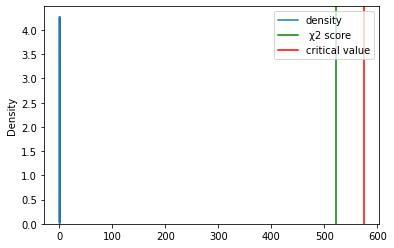

In [6]:
plt.figure()
sns.distplot(expected, hist=False)
plt.axvline(x=stats_g, color = 'green')
plt.axvline(x=574.15739681, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.4793998506554352 which is >= 0.05 (Accept H0).
</br>
χ2 score = 521.0 < critical value == 574.15739681 (Accept null hypothesis H0 and reject H1).

#### Null and Alternate Hypothesis
- H0:  gender and Loan Status are independent.
- H1:  gender has a dependency on the Loan Status.

In [7]:
# Between Loan Status and Gender
tab = pd.crosstab(credit_df.Loan_Status, credit_df.Gender)
stats_g, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats_g,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  0.1588291701997739 
p value=  0.6902367665572007 
d.o.f=  1


In [8]:
new_df = credit_df[["Loan_Status", "Gender"]]
Male_Y_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Gender == "Male"))])
Male_N_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Gender == "Male"))])
Female_Y_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Gender == "Female"))])
Female_N_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Gender == "Female"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


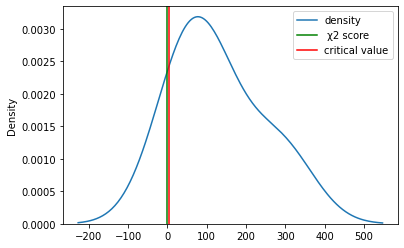

In [9]:
actual_observations = [[Male_Y_count, Male_N_count], [Female_Y_count, Female_N_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats_g, color = 'green')
plt.axvline(x=3.841, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.6902367665572007 which is >= 0.05 (Accept H0).
</br>
χ2 score = 0.1588291701997739 < critical value == 3.841 (Accept null hypothesis H0 and reject H1).

#### Null and Alternate Hypothesis
- H0:  Married and Loan Status are independent.
- H1:  Married has a dependency on the Loan Status.

In [10]:
# Between Loan Status and Married
tab = pd.crosstab(credit_df.Married, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  3.851837310804866 
p value=  0.04969152864604629 
d.o.f=  1


In [11]:
new_df = credit_df[["Loan_Status", "Married"]]
Y_Y_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Married == "Yes"))])
Y_N_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Married == "No"))])
N_Y_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Married == "Yes"))])
N_N_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Married == "No"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


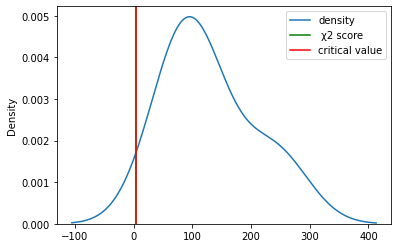

In [12]:
actual_observations = [[Y_Y_count, Y_N_count], [N_Y_count, N_N_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.841, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.04969152864604629 which is < 0.05 (Reject H0 and accept H1).
</br>
χ2 score = 3.851837310804866 > critical value = 3.841 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  Education and Loan Status are independent.
- H1:  Education has a dependency on the Loan Status.

In [13]:
# Between Loan Status and Education
tab = pd.crosstab(credit_df.Education, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  5.412089360791851 
p value=  0.019997766888094164 
d.o.f=  1


In [14]:
new_df = credit_df[["Loan_Status", "Education"]]
Y_G_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Education == "Graduate"))])
Y_NG_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Education == "Not Graduate"))])
N_G_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Education == "Graduate"))])
N_NG_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Education == "Not Graduate"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


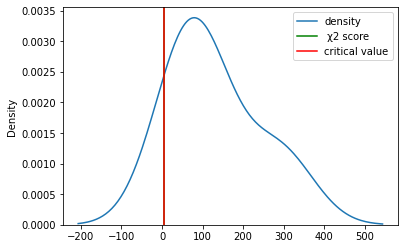

In [15]:
actual_observations = [[Y_G_count, Y_NG_count], [N_G_count, N_NG_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.841, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.019997766888094164 which is < 0.05 (Reject H0 and accept H1).
</br>
χ2 score = 5.412089360791851 > critical value = 3.841 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  Dependents and Loan Status are independent.
- H1:  Dependents has a dependency on the Loan Status.

In [16]:
# Between Loan Status and Dependents
tab = pd.crosstab(credit_df.Dependents, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  6.145781110794439 
p value=  0.10472909943994584 
d.o.f=  3


In [17]:
new_df = credit_df[["Loan_Status", "Dependents"]]
Y_0_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Dependents == 0.0))])
Y_1_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Dependents == 1.0))])
Y_2_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Dependents == 2.0))])
Y_3_plus_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Dependents == "3+"))])
N_0_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Dependents == 0.0))])
N_1_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Dependents == 1.0))])
N_2_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Dependents == 2.0))])
N_3_plus_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Dependents == "3+"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


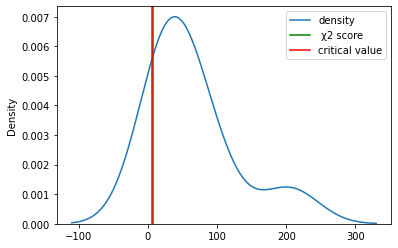

In [18]:
actual_observations = [[Y_0_count, Y_1_count, Y_2_count, Y_3_plus_count], 
                       [N_0_count, N_1_count, N_2_count, N_3_plus_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=7.815, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.10472909943994584 which is >= 0.05 (Accept H0).
</br>
χ2 score = 6.145781110794439 < critical value = 7.815 (Accept null hypothesis H0 and reject alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  Self_Employed and Loan Status are independent.
- H1:  Self_Employed has a dependency on the Loan Status.

In [19]:
# Between Loan Status and Self_Employed
tab = pd.crosstab(credit_df.Self_Employed, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  0.0 
p value=  1.0 
d.o.f=  1


In [20]:
new_df = credit_df[["Loan_Status", "Self_Employed"]]
Y_Y_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Self_Employed == "Yes"))])
Y_N_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Self_Employed == "No"))])
N_Y_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Self_Employed == "Yes"))])
N_N_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Self_Employed == "No"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


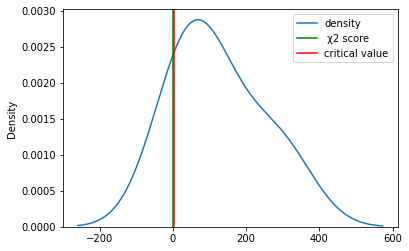

In [21]:
actual_observations = [[Y_Y_count, Y_N_count], [N_Y_count, N_N_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.841, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 1.0 which is >= 0.05 (Accept H0).
</br>
χ2 score = 0.0 < critical value = 3.841 (Accept null hypothesis H0 and reject alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  Credit_History and Loan Status are independent.
- H1:  Credit_History has a dependency on the Loan Status.

In [22]:
# Between Loan Status and Credit_History
tab = pd.crosstab(credit_df.Credit_History, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  138.21917360772596 
p value=  6.526142464733716e-32 
d.o.f=  1


In [23]:
new_df = credit_df[["Loan_Status", "Credit_History"]]
Y_Y_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Credit_History == 1.0))])
Y_N_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Credit_History == 0.0))])
N_Y_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Credit_History == 1.0))])
N_N_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Credit_History == 0.0))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


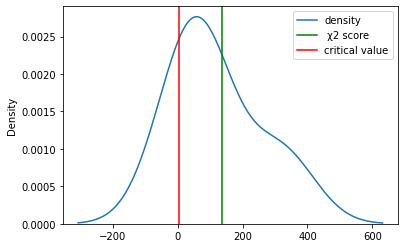

In [24]:
actual_observations = [[Y_Y_count, Y_N_count], [N_Y_count, N_N_count]]
plt.figure()
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.841, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 6.526142464733716e-32 which is < 0.05 (Reject H0 and accept H1).
</br>
χ2 score = 138.21917360772596 > critical value = 3.841 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  Property_Area and Loan Status are independent.
- H1:  Property_Area has a dependency on the Loan Status.

In [25]:
# Between Loan Status and Property_Area
tab = pd.crosstab(credit_df.Property_Area, credit_df.Loan_Status)
stats, p, dof, expected = chi2_contingency(tab)

print("Stats= ",stats,"\np value= ",p, "\nd.o.f= ", dof)

Stats=  15.929602448472624 
p value=  0.00034748077291321715 
d.o.f=  2


In [26]:
new_df = credit_df[["Loan_Status", "Property_Area"]]
Y_Su_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Property_Area == "Semiurban"))])
Y_U_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Property_Area == "Urban"))])
Y_R_count = len(new_df[((new_df.Loan_Status=="Y") & (new_df.Property_Area == "Rural"))])
N_Su_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Property_Area == "Semiurban"))])
N_U_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Property_Area == "Urban"))])
N_R_count = len(new_df[((new_df.Loan_Status=="N") & (new_df.Property_Area == "Rural"))])

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


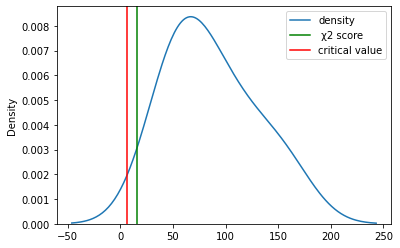

In [27]:
plt.figure()
actual_observations = [[Y_Su_count, Y_U_count, Y_R_count], 
                       [N_Su_count, N_U_count, N_R_count]]
sns.distplot(actual_observations, hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=5.991, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0.00034748077291321715 which is < 0.05 (Reject H0 and accept H1).
</br>
χ2 score = 15.929602448472624 > critical value = 5.991 (Reject null hypothesis H0 and accept alternate hypothesis H1).

In [28]:
# Encoding the Loan Status for one way annova testing
credit_df["Loan_Status_Encoded"] = credit_df.Loan_Status.map(lambda x: 1 if x.lower() == "y" else 0)
credit_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Encoded
0,294853.0,Male,No,0.0,Graduate,No,1316025.0,0.0,NaN,360.0,1.0,Urban,Y,1
1,162883.0,Male,Yes,1.0,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,N,0
2,620668.0,Male,Yes,0.0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,Y,1
3,295747.0,Male,Yes,0.0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,Y,1
4,133390.0,Male,No,0.0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,Y,1


## One way Annova Test for Numerical and categorical Data

#### Null and Alternate Hypothesis
- H0:  because of ApplicantIncome, there is a no significant impact on the Loan Status.
- H1:  because of ApplicantIncome, there is a significant impact on the Loan Status.

In [119]:
# between Loan_Status and ApplicantIncome
stats, p_value = f_oneway(credit_df.ApplicantIncome, credit_df.Loan_Status_Encoded)
print("Stats= ",stats,"\np value= ",p_value)

Stats=  374.6613260065049 
p value=  1.5802390462239362e-71


In [120]:
credit_df.ApplicantIncome.nunique()

433

In [121]:
def actual_observations(feature, df):
    unique_feat_sorted = sorted(df[feature].unique())
    obeservations = []
    for value in unique_feat_sorted:
        num_records = len(df[df[feature] == value])
        feature_n = df[(df[feature]==value) & (df.Loan_Status== "N")]
        feature_y = df[(df[feature]==value) & (df.Loan_Status== "Y")]
        obeservations.append([sum(feature_y[feature])/num_records, sum(feature_y[feature])/num_records])
    return obeservations

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


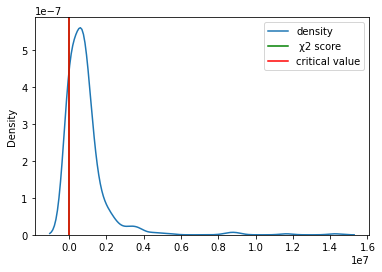

In [122]:
sns.distplot(actual_observations("ApplicantIncome", credit_df), hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.863, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 1.5802390462239362e-71 which is < 0.05 (Reject H0 and Accept H1).
<br />
χ2 score = 374.6613260065049 > critical value = 3.863 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  because of CoapplicantIncome, there is a no significant impact on the Loan Status.
- H1:  because of CoapplicantIncome, there is a significant impact on the Loan Status.

In [123]:
# between Loan_Status and CoapplicantIncome
stats, p_value = f_oneway(credit_df.CoapplicantIncome, credit_df.Loan_Status_Encoded)
print("Stats= ",stats,"\np value= ",p_value)

Stats=  273.59584909153523 
p value=  9.764327852421035e-55


In [124]:
credit_df.CoapplicantIncome.nunique()

250

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


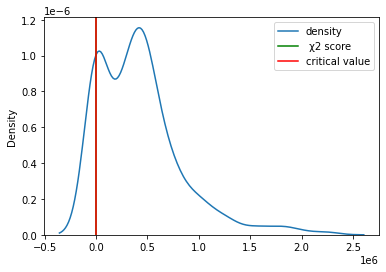

In [125]:
sns.distplot(actual_observations("CoapplicantIncome", credit_df), hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.879, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 9.248416127414886e-42 which is < 0.05 (Reject H0 and Accept H1).
<br />
χ2 score = 273.59584909153523 > critical value = 3.879 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  because of LoanAmount, there is a no significant impact on the Loan Status.
- H1:  because of LoanAmount, there is a significant impact on the Loan Status.

In [126]:
# drop null values 
new_credit_df = credit_df[credit_df["LoanAmount"].isnull() == False]

In [127]:
# between Loan_Status and LoanAmount
stats, p_value = f_oneway(new_credit_df.LoanAmount, new_credit_df.Loan_Status_Encoded)
print("Stats= ",stats,"\np value= ",p_value)

Stats=  1385.1687839571446 
p value=  2.6678960783750275e-193


In [128]:
new_credit_df.LoanAmount.nunique()

185

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


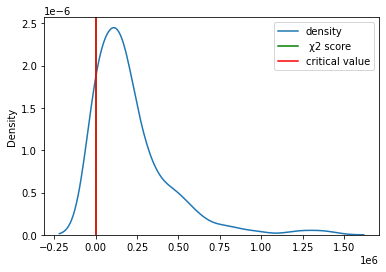

In [129]:
sns.distplot(actual_observations("LoanAmount", new_credit_df), hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=3.892, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 2.6678960783750275e-193 which is < 0.05 (Reject H0 and Accept H1).
<br />
χ2 score = 1385.1687839571446 > critical value = 3.892 (Reject null hypothesis H0 and accept alternate hypothesis H1).

#### Null and Alternate Hypothesis
- H0:  because of Loan_Amount_Term, there is a no significant impact on the Loan Status.
- H1:  because of Loan_Amount_Term, there is a significant impact on the Loan Status.

In [131]:
# drop null values 
new_credit_df = credit_df[credit_df["Loan_Amount_Term"].isnull() == False]

In [132]:
# between Loan_Status and Loan_Amount_Term
stats, p_value = f_oneway(new_credit_df.Loan_Amount_Term, new_credit_df.Loan_Status_Encoded)
print("Stats= ",stats,"\np value= ",p_value)

Stats=  14705.356059942016 
p value=  0.0


In [133]:
new_credit_df.Loan_Amount_Term.nunique()

10

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


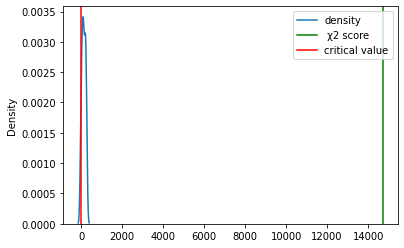

In [134]:
sns.distplot(actual_observations("Loan_Amount_Term", new_credit_df), hist=False)
plt.axvline(x=stats, color = 'green')
plt.axvline(x=5.117, color = 'red')
plt.legend(["density", " χ2 score", "critical value"], loc ="upper right")
plt.show()

p-value = 0 which is < 0.05 (Reject H0 and Accept H1).
<br />
χ2 score = 14705.356059942016 > critical value = 5.117 (Reject null hypothesis H0 and accept alternate hypothesis H1).

### Visualization and Explaination to support the Hypothesis Testing

<AxesSubplot:xlabel='Gender'>

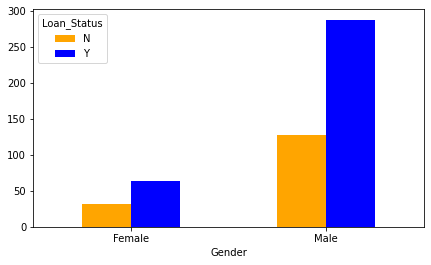

In [43]:
# Grouped Bar char between Gender and Loan_Status
# Cross tabulation between Gender and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df['Gender'],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The ratio for loan approval rate (approved / non approved) between two different gender are almost same roughly 2:1 so we can infer that Loan Status is same for both gender. Hence, we can say that Gender is not dependent on Loan Status.

<AxesSubplot:xlabel='Married'>

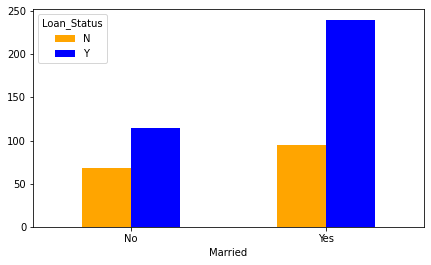

In [44]:
# Grouped Bar char between Married and Loan_Status
# Cross tabulation between Married and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df['Married'],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The loan approval rate is higher for married applicant than non married applicant. Hence, we can say that Loan Status has dependency on the whether the applicant is married or not.

<AxesSubplot:xlabel='Education'>

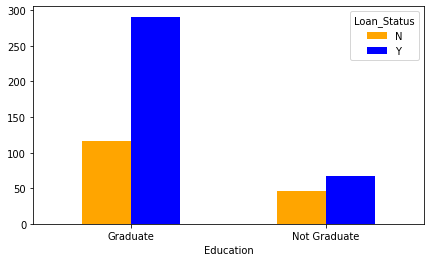

In [45]:
# Grouped Bar char between Education and Loan_Status
# Cross tabulation between education and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df['Education'],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The loan approval rate for graduate is more compared to non graduate applicant. Hence, gradute applicant has more chnace of getting loan over non gradute applicant. Hence, Graduate feature has some dependency on Loan status. 

<AxesSubplot:xlabel='Dependents'>

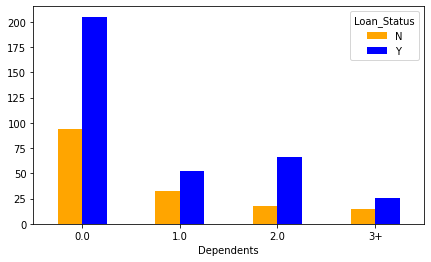

In [46]:
# Grouped Bar char between Dependents and Loan_Status
# Cross tabulation between Dependents and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df['Dependents'],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The loan approval rate for different dependents number is almost similar except for dependents number 2 which represent small number of samples. Hence, we can't see any significant bias based on the number of dependents on our dataset while making decision on loan status. Hence dependents have minimal dependency on Loan Status.

<AxesSubplot:xlabel='Self_Employed'>

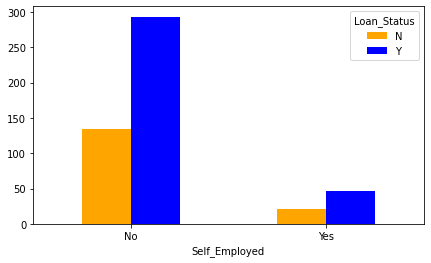

In [47]:
# Grouped Bar char between Self_Employed and Loan_Status
# Cross tabulation between Self_Employed and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df['Self_Employed'],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The Loan Approval rates for an applicant based on the whether the person is self employed or not are almost similar. Hence, it seems the apllicant self employed status have zero effeect on decision making process for loan approval.

<AxesSubplot:xlabel='Credit_History'>

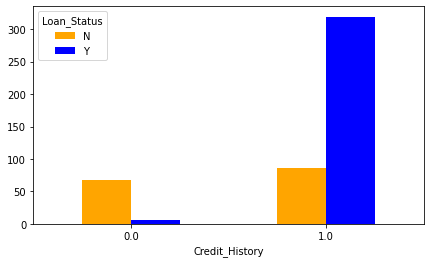

In [48]:
# Grouped Bar char between Credit_History and Loan_Status
# Cross tabulation between Credit_History and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df["Credit_History"],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The approval rate for applicant with and without credit history differs starkly and hence, from graph we can say that an applicant with credit history is favored over an applicant without credit history. Hence, credit history has significant impact on Loan Status.

<AxesSubplot:xlabel='Property_Area'>

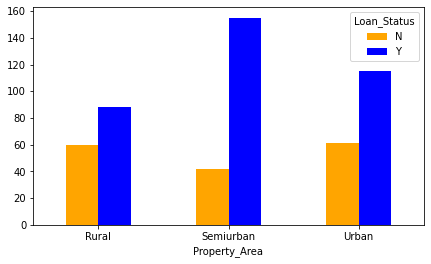

In [49]:
# Grouped Bar char between Property_Area and Loan_Status
# Cross tabulation between Property_Area and Loan_Status
CrosstabResult=pd.crosstab(index=credit_df["Property_Area"],columns=credit_df['Loan_Status'])
CrosstabResult.plot.bar(figsize=(7,4), color = {"Y": "blue", "N": "orange"}, rot=0)

The approval rate is highest for an applicant living in semiurban area and it is closely similar for urban and rural area. It seems that for decision making process is favored for semi urban are compared to the urban and rural. Hence, property area has dependency over Loan Status.

### Splitting dataframe based on Approved and Not Approved Loan Status

In [50]:
approved_credit_df = credit_df[credit_df["Loan_Status"]=="Y"]
reject_credit_df = credit_df[credit_df["Loan_Status"] == "N"]

#### Violion and KDE plot between target Variable and Numerical (independent) variable

#### ApplicantIncome vs Loan_Status

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


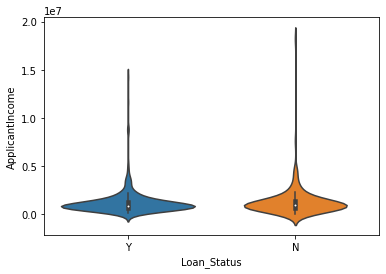

In [51]:
sns.violinplot(credit_df.Loan_Status, credit_df.ApplicantIncome)
plt.show()

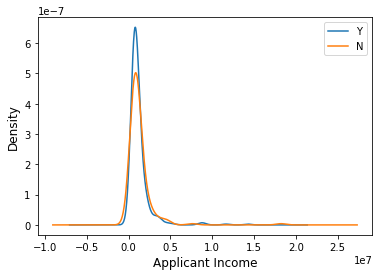

In [52]:
fig = plt.figure()
approved_credit_df.ApplicantIncome.plot.kde()
reject_credit_df.ApplicantIncome.plot.kde()
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Y', 'N'])
plt.show()

#### Conculsion
From the kde plot, the plot of population density for both accepted and rejected loan status are in normal distribution in nature which captures a lots of variance for target variable. Both plots, indicates both cases are centered around same mean value. Hence, Applicant Income has high significance to target variable(loan status).

#### CoapplicantIncome vs Loan_Status

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


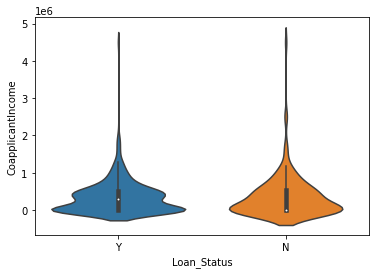

In [53]:
sns.violinplot(credit_df.Loan_Status, credit_df.CoapplicantIncome)
plt.show()

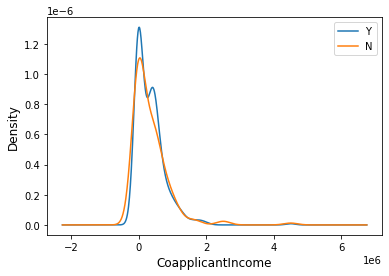

In [54]:
fig = plt.figure()
approved_credit_df.CoapplicantIncome.plot.kde()
reject_credit_df.CoapplicantIncome.plot.kde()
plt.xlabel('CoapplicantIncome', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Y', 'N'])
plt.show()

#### Conclusion
From the kde plot, the plot of population density for both accepted and rejected loan status are in fairly normal distribution in nature which captures a lots of variance for target variable. Both plots, indicates both cases are centered around same mean value. Hence, Coapplicant Income has fair significance to target variable(loan status).

#### LoanAmount vs Loan_Status

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


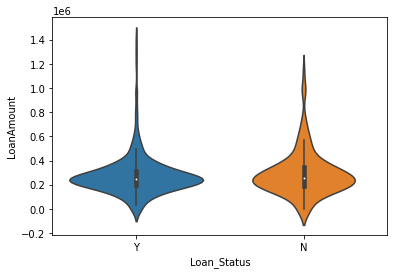

In [55]:
sns.violinplot(credit_df.Loan_Status, credit_df.LoanAmount)
plt.show()

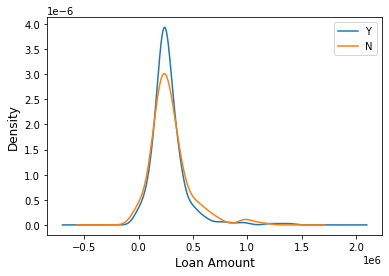

In [56]:
fig = plt.figure()
approved_credit_df.LoanAmount.plot.kde()
reject_credit_df.LoanAmount.plot.kde()
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Y', 'N'])
plt.show()

#### Conclusion
From the kde plot, the plot of population density for both accepted and rejected loan status are in normal distribution in nature which captures a lots of variance for target variable. Both plots, indicates both cases are centered around same mean value. Hence, Loan Amount has high significance to target variable(loan status).

#### Loan_Amount_Term vs Loan_Status

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


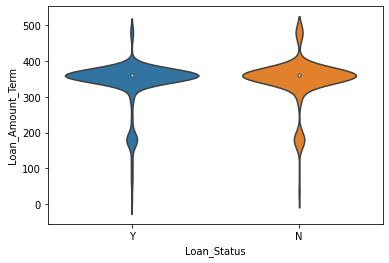

In [57]:
sns.violinplot(credit_df.Loan_Status, credit_df.Loan_Amount_Term)
plt.show()

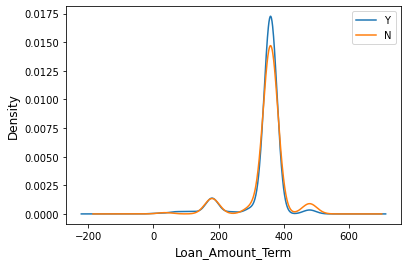

In [103]:
fig = plt.figure()
approved_credit_df.Loan_Amount_Term.plot.kde()
reject_credit_df.Loan_Amount_Term.plot.kde()
plt.xlabel('Loan_Amount_Term', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Y', 'N'])
plt.show()

#### Conclusion
From the kde plot, the plot of population density for both accepted and rejected loan status are in normal distribution in nature which captures a lots of variance for target variable. Both plots, indicates both cases are centered around same mean value. Hence, Loan Amount Term has high significance to target variable(loan status).

<a href="https://www.socscistatistics.com/tests/criticalvalues/default.aspx">Link for critical value calculation</a>